In [2]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy.linalg import qr
from scipy import optimize
from scipy.special import erfinv
from scipy.optimize import minimize_scalar
import egrss 
import time
import lambda_fun 
import os

sigma = 0.1
a,b   = -0.2, 0.5

def y(x):
    return 0.25*np.cos(4*np.pi *x) + 0.15*np.sin(12* np.pi *x) + 0.2 * x

In [3]:
# finding runtimes for varying degrees
degree_range = range(1,6)
GML_deg = np.zeros([10,5])
N = 100
for i in range(10):
    for j in range(5):
        x = np.linspace(a,b, N)
        yhat = y(x) + sigma * np.random.normal(loc = 0, scale = 1, size = N)
        start_time = time.time()
        res_GML = lambda_fun.min_GML(N = 100, x = x, p = degree_range[j], yhat = yhat, method = 'bounded', usage = 'min', bounds = (1,12))
        GML_deg[i, j] = (time.time() - start_time)
        print("model: GML, N: %d, degree: %d, time: %s seconds" % (N, degree_range[j], time.time() - start_time))

GCV_deg = np.zeros([10,5])
for i in range(10):
    for j in range(5):
        x = np.linspace(a,b, N)
        yhat = y(x) + sigma * np.random.normal(loc = 0, scale = 1, size = N)
        start_time = time.time()
        res_GCV = lambda_fun.min_GCV(N = 100, x = x , p = degree_range[j], yhat = yhat, method = 'bounded', usage = 'min', bounds = (1,12))
        GCV_deg[i, j] = (time.time() - start_time)
        print("model: GCV, N: %d, degree: %d, time: %s seconds" % (N, degree_range[j], time.time() - start_time))

     

model: GML, N: 100, degree: 1, time: 0.056817054748535156 seconds
model: GML, N: 100, degree: 2, time: 0.05837416648864746 seconds
model: GML, N: 100, degree: 3, time: 0.06588602066040039 seconds
model: GML, N: 100, degree: 4, time: 0.20209121704101562 seconds
model: GML, N: 100, degree: 5, time: 0.2115340232849121 seconds
model: GML, N: 100, degree: 1, time: 0.05015206336975098 seconds
model: GML, N: 100, degree: 2, time: 0.06510376930236816 seconds
model: GML, N: 100, degree: 3, time: 0.06950902938842773 seconds
model: GML, N: 100, degree: 4, time: 0.20682430267333984 seconds
model: GML, N: 100, degree: 5, time: 0.2322711944580078 seconds
model: GML, N: 100, degree: 1, time: 0.08950400352478027 seconds
model: GML, N: 100, degree: 2, time: 0.06300806999206543 seconds
model: GML, N: 100, degree: 3, time: 0.11258602142333984 seconds
model: GML, N: 100, degree: 4, time: 0.24442195892333984 seconds
model: GML, N: 100, degree: 5, time: 0.2841477394104004 seconds
model: GML, N: 100, degree:

In [4]:
   
        
# finding runtimes for varying numbers of observations
p = 2
numpoints = np.logspace(2,4,8, dtype = int)  
GML_N = np.zeros([len(numpoints),1])
p = 2
for i in range(len(numpoints)):
    for j in range(1):
        N = numpoints[i]
        x = np.linspace(a,b, N)
        yhat = y(x) + sigma * np.random.normal(loc = 0, scale = 1, size = N)
        start_time = time.time()
        res_GML = lambda_fun.min_GML(N = N, x = x, p = 2, yhat = yhat, method = 'bounded', usage = 'min', bounds = (1,12))
        GML_N[i, j] = (time.time() - start_time)
        print("model: GML, N: %d, degree: %d, time: %s seconds" % (N, p, time.time() - start_time))

numpoints = np.logspace(2,4,8, dtype = int) 
GCV_N = np.zeros([len(numpoints),1])
p = 2
for i in range(len(numpoints)):
    for j in range(1):
        N = numpoints[i]
        x = np.linspace(a,b, N)
        yhat = y(x) + sigma * np.random.normal(loc = 0, scale = 1, size = N)
        start_time = time.time()
        res_GCV = lambda_fun.min_GCV(N = N, x = x, p = 2, yhat = yhat, method = 'bounded', usage = 'min', bounds = (1,12))
        GCV_N[i, j] = (time.time() - start_time)
        print("model: GCV, N: %d, degree: %d, time: %s seconds" % (N, p, time.time() - start_time))

model: GML, N: 100, degree: 2, time: 0.08620786666870117 seconds
model: GML, N: 193, degree: 2, time: 0.09174919128417969 seconds
model: GML, N: 372, degree: 2, time: 0.18072175979614258 seconds
model: GML, N: 719, degree: 2, time: 0.33908677101135254 seconds
model: GML, N: 1389, degree: 2, time: 0.5967237949371338 seconds
model: GML, N: 2682, degree: 2, time: 1.2113189697265625 seconds
model: GML, N: 5179, degree: 2, time: 2.8240489959716797 seconds
model: GML, N: 10000, degree: 2, time: 4.074703931808472 seconds
model: GCV, N: 100, degree: 2, time: 0.36302995681762695 seconds
model: GCV, N: 193, degree: 2, time: 1.278425693511963 seconds
model: GCV, N: 372, degree: 2, time: 4.149745225906372 seconds
model: GCV, N: 719, degree: 2, time: 15.405523777008057 seconds
model: GCV, N: 1389, degree: 2, time: 38.36375021934509 seconds
model: GCV, N: 2682, degree: 2, time: 189.31311631202698 seconds
model: GCV, N: 5179, degree: 2, time: 601.6472778320312 seconds
model: GCV, N: 10000, degree: 2,

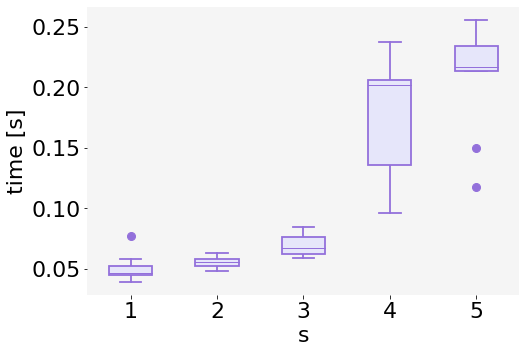

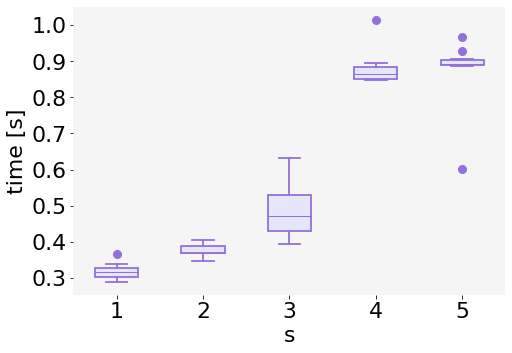

In [68]:
def plot_deg(y, xlabel, ylabel, savename):
    fig = plt.figure()
    ax = fig.add_axes([0, 0,  1, 1])
    c = 'lavender'
    d = 'mediumpurple'
    lw = 1.8
    bp = ax.boxplot(y, positions=[1,2,3,4,5], patch_artist=True,
            boxprops=dict(facecolor=c, color=d, linewidth = lw),
            capprops=dict(color=d, linewidth = lw),
            whiskerprops=dict(color=d , linewidth = lw),
            flierprops=dict(color=d, markeredgecolor=d, marker='o', markerfacecolor=d, markersize=8,linewidth = lw),
            medianprops=dict(color=d),
            )
    plt.xlabel(xlabel, fontsize = 22)
    plt.ylabel(ylabel, fontsize = 22)
    
    plt.yticks(fontsize = 22)
    plt.xticks(fontsize = 22)
    plt.tick_params(left=True, bottom = True, right = False, top = False)
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.show
    

    my_path = os.getcwd()
    fig.savefig(my_path + savename, bbox_inches='tight')
    
  
plot_deg(GML_deg, xlabel = 's', ylabel = 'time [s]',savename = "/Plots/GML_deg.pdf")

plot_deg(GCV_deg, xlabel = 's', ylabel = 'time [s]', savename = "/Plots/GCV_deg.pdf")

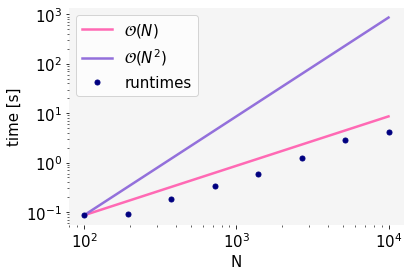

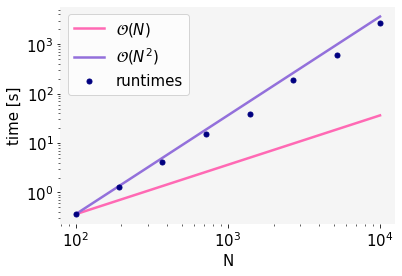

In [5]:
def plot_N(x,y, col, xlabel, ylabel, savename):
    fig = plt.figure()
    x1 = np.linspace(np.min(x), np.max(x), 100)
    y0mean = np.mean(y[0,:])
    y1mean = np.mean(y[1,:])
    plt.loglog(x1,y0mean/x[0]*x1, '-' , linewidth = 2.5, color= 'hotpink', label = '$\mathcal{O}(N)$')
    plt.loglog(x1, y0mean/(x[0]**2)*x1**2 , '-' , linewidth = 2.5, color= 'mediumpurple', label = '$\mathcal{O}(N^2)$')
    plt.loglog(x,y, '.' ,color = col, markersize = 10, label = 'runtimes')
    plt.legend(loc = 'best', fontsize = 15)

    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.tick_params(left=True, bottom = True, right = False, top = False)
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.show
    
    my_path = os.getcwd()
    fig.savefig(my_path + savename, bbox_inches='tight')
    
    


plot_N(numpoints, GML_N, 'navy', xlabel = 'N', ylabel = 'time [s]', savename = "/Plots/GML_N.pdf")

plot_N(numpoints, GCV_N, 'navy', xlabel = 'N', ylabel = 'time [s]', savename = "/Plots/GCV_N.pdf")

array([[2.85921097e-01],
       [1.08572483e+00],
       [3.98954487e+00],
       [1.34337430e+01],
       [4.94160118e+01],
       [1.82541174e+02],
       [5.83219553e+02],
       [2.36022413e+03]])

array([[0.04736805],
       [0.08217978],
       [0.17164493],
       [0.27098274],
       [0.569098  ],
       [1.17542315],
       [2.49221206],
       [4.32925797]])

In [69]:
GML_N

array([[0.04736805],
       [0.08217978],
       [0.17164493],
       [0.27098274],
       [0.569098  ],
       [1.17542315],
       [2.49221206],
       [4.32925797]])

In [70]:
GCV_N

array([[2.85921097e-01],
       [1.08572483e+00],
       [3.98954487e+00],
       [1.34337430e+01],
       [4.94160118e+01],
       [1.82541174e+02],
       [5.83219553e+02],
       [2.36022413e+03]])